# Introduction to Text Mining and Natural Language Processing

In [ ]:
pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 4.3 MB/s 


In [ ]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import re
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#read document
#df = pd.read_csv("/content/drive/MyDrive/reviews.csv")
df = pd.read_csv("/content/drive/MyDrive/BANA 275/reviews.csv")
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOETV_gyK_4K53K_0hip-ofKkumdJlGwWUBestu...,Brent Schoemann,https://play-lh.googleusercontent.com/a/AATXAJ...,I used to love this app. I have used it for ye...,1,33,5.15.4.2,2022-04-25 15:55:21,"Unfortunately, Amazon has rejected our fix and...",2022-04-26 16:53:39,most_relevant,com.anydo
1,gp:AOqpTOG-nGuDe0w6if400pTvNJnK3MlfnEcJLIB84aR...,Ben Maybe,https://play-lh.googleusercontent.com/a/AATXAJ...,But the paid version for a year and never succ...,1,56,5.15.4.2,2022-03-01 17:18:50,"Hi, we're sorry to hear you're experiencing is...",2022-03-01 15:53:58,most_relevant,com.anydo
2,gp:AOqpTOH85sc18Ajgcgj6-IGmA7Gp34fVsrbyBJ274IZ...,Anthony Duarte,https://play-lh.googleusercontent.com/a-/AOh14...,"As a programmer, this is absolutely the most l...",1,75,5.15.3.0,2022-01-22 11:33:48,We are sorry you feel this way! We encourage u...,2022-01-24 09:59:17,most_relevant,com.anydo
3,gp:AOqpTOGxyMqOStnhbQ_mLfnLUfd1DHAt5uRXqDNArML...,Anthony Cannon,https://play-lh.googleusercontent.com/a/AATXAJ...,Redoing my review after messaging with the app...,1,80,5.15.3.0,2022-01-22 13:34:47,"Any.do is a free app, 90% of the app is comple...",2022-01-24 09:58:12,most_relevant,com.anydo
4,gp:AOqpTOECnmXVoFIJ9QXAK5krNRuVmF7Xpl-Xbutb2KH...,Emie Hickman,https://play-lh.googleusercontent.com/a-/AOh14...,After a task is done a duplicate will appear f...,1,0,NaN,2022-02-22 03:24:11,We would be happy to help you resolve all of t...,2022-02-24 16:34:04,most_relevant,com.anydo


In [ ]:
df['content'][0]

'I used to love this app. I have used it for years. I even had (until yesterday) the paid version. I primarily use this app to sync up my alexa tasks. It started having issues, then got fixed. Now the company is saying that Amazon sync is no longer usable (unless you want to add a 3rd party to allow it access to your Amazon account).'

In [ ]:
df.shape

(17138, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17138 entries, 0 to 17137
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              17138 non-null  object
 1   userName              17138 non-null  object
 2   userImage             17138 non-null  object
 3   content               17138 non-null  object
 4   score                 17138 non-null  int64 
 5   thumbsUpCount         17138 non-null  int64 
 6   reviewCreatedVersion  14451 non-null  object
 7   at                    17138 non-null  object
 8   replyContent          9086 non-null   object
 9   repliedAt             9086 non-null   object
 10  sortOrder             17138 non-null  object
 11  appId                 17138 non-null  object
dtypes: int64(2), object(10)
memory usage: 1.6+ MB


In [ ]:
def detect_tb_polarity(text):
    return TextBlob(text).sentiment.polarity

def detect_tb_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def detect_vader_pos(text):
    return vader.polarity_scores(text)['pos']
    
def detect_vader_neg(text):
    return vader.polarity_scores(text)['neg']

def detect_vader_comp(text):
    return vader.polarity_scores(text)['compound']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17138 entries, 0 to 17137
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              17138 non-null  object
 1   userName              17138 non-null  object
 2   userImage             17138 non-null  object
 3   content               17138 non-null  object
 4   score                 17138 non-null  int64 
 5   thumbsUpCount         17138 non-null  int64 
 6   reviewCreatedVersion  14451 non-null  object
 7   at                    17138 non-null  object
 8   replyContent          9086 non-null   object
 9   repliedAt             9086 non-null   object
 10  sortOrder             17138 non-null  object
 11  appId                 17138 non-null  object
dtypes: int64(2), object(10)
memory usage: 1.6+ MB


In [ ]:
vader = SentimentIntensityAnalyzer()
temp3 = vader.polarity_scores("Textblob is amazingly simple to use. What great fun!")

In [ ]:
#Drop unnecessary and irrelevant attributes
df = df[['content','score']]
df

,content,score
0,I used to love this app. I have used it for ye...,1
1,But the paid version for a year and never succ...,1
2,"As a programmer, this is absolutely the most l...",1
3,Redoing my review after messaging with the app...,1
4,After a task is done a duplicate will appear f...,1
...,...,...
17133,Best Planner I have found yet! I appreciate ho...,5
17134,Have a blessed day and night ❤️🌉💞🌉,5
17135,Great app,5
17136,Good,5


In [ ]:
df.isnull().sum()

content    0
score      0
dtype: int64

In [ ]:
df['score'] = df['score'].astype(float)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
#Make new doc
Clear_reviews = pd.DataFrame(df)
Clear_reviews.to_csv('Clear_reviews.csv', index=None, header=True)

# 1. Text Preprocessing

In [ ]:
# Converting to lower case 
def text_lowercase(text):
    return text.lower()
df['content']= df['content'].apply(lambda x:text_lowercase(x))
df.head()


,content,score
0,i used to love this app. i have used it for ye...,1.00
1,but the paid version for a year and never succ...,1.00
2,"as a programmer, this is absolutely the most l...",1.00
3,redoing my review after messaging with the app...,1.00
4,after a task is done a duplicate will appear f...,1.00


In [ ]:
#remove extra white space
def remove_whitespace(text):
    return  " ".join(text.split())
df['content']= df['content'].apply(lambda x:remove_whitespace(x))
df

df['content'] = df['content'].astype(str)
df.content = df.content.str.lstrip()
df

,content,score
0,i used to love this app. i have used it for ye...,1.00
1,but the paid version for a year and never succ...,1.00
2,"as a programmer, this is absolutely the most l...",1.00
3,redoing my review after messaging with the app...,1.00
4,after a task is done a duplicate will appear f...,1.00
...,...,...
17128,excellent planner,5.00
17129,so far so good,5.00
17131,excellent!,5.00
17133,best planner i have found yet! i appreciate ho...,5.00


In [ ]:
# Punctuations
df['content'] = df['content'].str.replace('[^\w\s]', '')

In [ ]:
# convert number into word
import inflect
p = inflect.engine()
 
def convert_number(text):
    temp1 = text.split()
    new_string = []
 
    for word in temp1:
        if word.isdigit():
            temp = p.number_to_words(word)
            new_string.append(temp)
        else:
            new_string.append(word)
 
    temp1 = ' '.join(new_string)
    return temp1

df['content']= df['content'].apply(lambda x:convert_number(x))
df

,content,score
0,i used to love this app i have used it for yea...,1.00
1,but the paid version for a year and never succ...,1.00
2,as a programmer this is absolutely the most la...,1.00
3,redoing my review after messaging with the app...,1.00
4,after a task is done a duplicate will appear f...,1.00
...,...,...
17128,excellent planner,5.00
17129,so far so good,5.00
17131,excellent,5.00
17133,best planner i have found yet i appreciate how...,5.00


In [ ]:
# Stopwords
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')
df['content'] = df['content'].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop_words))

In [ ]:
# Rarewords
dps = pd.Series(' '.join(df['content']).split()).value_counts()[-1500:]
df['content'] = df['content'].apply(lambda x: " ".join(x for x in x.split() if x not in dps))

In [ ]:
# Tokenization
nltk.download("punkt")
df["content"].apply(lambda x: TextBlob(x).words).head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    [used, love, app, used, year, even, yesterday,...
1    [paid, version, year, never, succeeded, gettin...
2    [programmer, absolutely, lazily, put, together...
3    [redoing, review, messaging, app, basically, e...
4    [task, done, duplicate, appear, task, causing,...
Name: content, dtype: object

In [ ]:
# Lemmatization

nltk.download('wordnet')
df['content'] = df['content'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

df['content'].head(10)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    used love app used year even yesterday paid ve...
1    paid version year never succeeded getting 3day...
2    programmer absolutely lazily put together tras...
3    redoing review messaging app basically everyth...
4    task done duplicate appear task causing remove...
5    app great latest update grocery list changed a...
6    product image show month view top screen dot o...
7    app used great paired alexa every awhile sync ...
8    annoyed keep signing deleted list ive working ...
9    really like app horrible problem crashing cons...
Name: content, dtype: object

# 2. Text Visualization

In [ ]:
# Calculation of Term Frequencies
tf = df["content"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf.columns = ["words", "tf"]
tf.head()

,words,tf
0,used,831.00
1,app,10789.00
2,sync,759.00
3,amazon,10.00
4,fixed,211.00


In [ ]:
tf.shape

(12902, 2)

In [ ]:
tf["words"].nunique()

12902

In [ ]:
tf["tf"].describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99]).T

count   12902.00
mean       22.87
std       155.16
min         1.00
5%          1.00
10%         1.00
25%         1.00
50%         1.00
75%         5.00
80%         8.00
90%        29.00
95%        76.00
99%       388.00
max     10789.00
Name: tf, dtype: float64

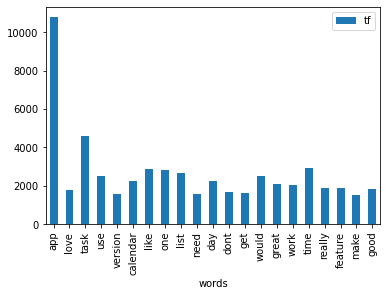

In [ ]:
# Barplot make it to 1500
tf[tf["tf"] > 1500].plot.bar(x="words", y="tf")
plt.show()

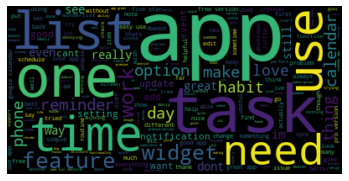

In [ ]:
# Wordcloud
text = " ".join(i for i in df.content)
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

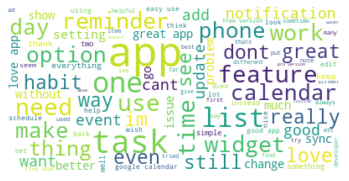

In [ ]:
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud.to_file("wordcloud.png")

# 3. Sentiment Analysis

In [ ]:
# NLTK already has a built-in, pretrained sentiment analyzer
# called VADER (Valence Aware Dictionary and sEntiment Reasoner).

df.head()

,content,score
0,used love app used year even yesterday paid ve...,1.00
1,paid version year never succeeded getting 3day...,1.00
2,programmer absolutely lazily put together tras...,1.00
3,redoing review messaging app basically everyth...,1.00
4,task done duplicate appear task causing remove...,1.00


In [ ]:
# Caizhen Huang
vader = SentimentIntensityAnalyzer()

In [ ]:
vader.polarity_scores("The film was awesome")

{'compound': 0.6249, 'neg': 0.0, 'neu': 0.423, 'pos': 0.577}

In [ ]:
vader.polarity_scores("I liked this music but it is not good as the other one")

{'compound': -0.298, 'neg': 0.194, 'neu': 0.687, 'pos': 0.119}

In [ ]:
def detect_tb_polarity(text):
    return TextBlob(text).sentiment.polarity

def detect_tb_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def detect_vader_pos(text):
    return vader.polarity_scores(text)['pos']
    
def detect_vader_neg(text):
    return vader.polarity_scores(text)['neg']

def detect_vader_comp(text):
    return vader.polarity_scores(text)['compound']

In [ ]:
vader.polarity_scores(df.content[0])

{'compound': 0.8885, 'neg': 0.0, 'neu': 0.675, 'pos': 0.325}

In [ ]:

df['tb_polarity'] = df.content.apply(detect_tb_polarity)
df['tb_subjectivity'] = df.content.apply(detect_tb_subjectivity)

In [ ]:
vader = SentimentIntensityAnalyzer()
df['vader_pos'] = df.content.apply(detect_vader_pos)
df['vader_neg'] = df.content.apply(detect_vader_neg)
df['vader_comp'] = df.content.apply(detect_vader_comp)

In [ ]:
df.head(25)

,content,score,tb_polarity,tb_subjectivity,vader_pos,vader_neg,vader_comp
0,used love app used year even yesterday paid ve...,1.00,0.25,0.33,0.33,0.00,0.89
1,paid version year never succeeded getting 3day...,1.00,0.06,0.61,0.11,0.15,-0.21
2,programmer absolutely lazily put together tras...,1.00,-0.13,0.43,0.17,0.06,0.70
3,redoing review messaging app basically everyth...,1.00,0.30,0.53,0.19,0.12,0.48
4,task done duplicate appear task causing remove...,1.00,-0.12,0.66,0.10,0.12,-0.18
5,app great latest update grocery list changed a...,1.00,0.09,0.50,0.14,0.12,0.34
6,product image show month view top screen dot o...,1.00,0.15,0.36,0.16,0.08,0.49
7,app used great paired alexa every awhile sync ...,1.00,0.18,0.33,0.08,0.06,0.25
8,annoyed keep signing deleted list ive working ...,1.00,0.06,0.30,0.10,0.06,0.36
9,really like app horrible problem crashing cons...,1.00,-0.07,0.58,0.20,0.30,-0.77


# 4. Sentiment Modeling

In [ ]:
df.head(25)

,content,score,tb_polarity,tb_subjectivity,vader_pos,vader_neg,vader_comp
0,used love app used year even yesterday paid ve...,1.00,0.25,0.33,0.33,0.00,0.89
1,paid version year never succeeded getting 3day...,1.00,0.06,0.61,0.11,0.15,-0.21
2,programmer absolutely lazily put together tras...,1.00,-0.13,0.43,0.17,0.06,0.70
3,redoing review messaging app basically everyth...,1.00,0.30,0.53,0.19,0.12,0.48
4,task done duplicate appear task causing remove...,1.00,-0.12,0.66,0.10,0.12,-0.18
5,app great latest update grocery list changed a...,1.00,0.09,0.50,0.14,0.12,0.34
6,product image show month view top screen dot o...,1.00,0.15,0.36,0.16,0.08,0.49
7,app used great paired alexa every awhile sync ...,1.00,0.18,0.33,0.08,0.06,0.25
8,annoyed keep signing deleted list ive working ...,1.00,0.06,0.30,0.10,0.06,0.36
9,really like app horrible problem crashing cons...,1.00,-0.07,0.58,0.20,0.30,-0.77


In [ ]:
def fun(num):
  
    if num>0:
        return "positive"
  
    else:
        return "negative"

In [ ]:
df["vader_comp"][0:10].apply(fun)

0    positive
1    negative
2    positive
3    positive
4    negative
5    positive
6    positive
7    positive
8    positive
9    negative
Name: vader_comp, dtype: object

In [ ]:
df["sentiment"] = df["vader_comp"].apply(fun)
df.head(20)

,content,score,tb_polarity,tb_subjectivity,vader_pos,vader_neg,vader_comp,sentiment
0,used love app used year even yesterday paid ve...,1.00,0.25,0.33,0.33,0.00,0.89,positive
1,paid version year never succeeded getting 3day...,1.00,0.06,0.61,0.11,0.15,-0.21,negative
2,programmer absolutely lazily put together tras...,1.00,-0.13,0.43,0.17,0.06,0.70,positive
3,redoing review messaging app basically everyth...,1.00,0.30,0.53,0.19,0.12,0.48,positive
4,task done duplicate appear task causing remove...,1.00,-0.12,0.66,0.10,0.12,-0.18,negative
5,app great latest update grocery list changed a...,1.00,0.09,0.50,0.14,0.12,0.34,positive
6,product image show month view top screen dot o...,1.00,0.15,0.36,0.16,0.08,0.49,positive
7,app used great paired alexa every awhile sync ...,1.00,0.18,0.33,0.08,0.06,0.25,positive
8,annoyed keep signing deleted list ive working ...,1.00,0.06,0.30,0.10,0.06,0.36,positive
9,really like app horrible problem crashing cons...,1.00,-0.07,0.58,0.20,0.30,-0.77,negative


In [ ]:
df["sentiment"].value_counts()

positive    9297
negative    3655
Name: sentiment, dtype: int64

In [ ]:

df.groupby("sentiment")["score"].mean()

sentiment
negative   2.25
positive   3.43
Name: score, dtype: float64

In [ ]:
# Encode target labels with value between 0 and n_classes-1.
df["sentiment"] = LabelEncoder().fit_transform(df["sentiment"])

X = df["content"]
y = df["sentiment"]

In [ ]:
# Count Vectors

from sklearn.feature_extraction.text import CountVectorizer

example_docs=[
       "One Cent, Two Cents, Old Cent, New Cent: All About Money (Cat in the Hat's Learning Library",
       "Inside Your Outside: All About the Human Body (Cat in the Hat's Learning Library)",
       "Oh, The Things You Can Do That Are Good for You: All About Staying Healthy (Cat in the Hat's Learning Library)",
       "On Beyond Bugs: All About Insects (Cat in the Hat's Learning Library)",
       "On Beyond Bugs: One About Insects (Cat in the Hat's Learning Library)",
       "On Beyond Bugs: Two About Insects (Cat in the Hat's Learning Library)",
       "There's No Place Like Space: All About Our Solar System (Cat in the Hat's Learning Library)" 
      ]

In [ ]:
bow =  CountVectorizer()
bow.fit(example_docs)

CountVectorizer()

In [ ]:
df.head()

,content,score,tb_polarity,tb_subjectivity,vader_pos,vader_neg,vader_comp,sentiment
0,used love app used year even yesterday paid ve...,1.00,0.25,0.33,0.33,0.00,0.89,1
1,paid version year never succeeded getting 3day...,1.00,0.06,0.61,0.11,0.15,-0.21,0
2,programmer absolutely lazily put together tras...,1.00,-0.13,0.43,0.17,0.06,0.70,1
3,redoing review messaging app basically everyth...,1.00,0.30,0.53,0.19,0.12,0.48,1
4,task done duplicate appear task causing remove...,1.00,-0.12,0.66,0.10,0.12,-0.18,0


In [ ]:
# Caizhen Huang end

In [ ]:
# TFIDF
vectorizer = CountVectorizer()
X_c = vectorizer.fit_transform(example_docs)
vectorizer.get_feature_names()
X_c.toarray()

array([[1, 1, 0, 0, 0, 0, 0, 1, 3, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
        1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1],
       [1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 2, 0],
       [1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 

In [ ]:
# n-gram 
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X_n = vectorizer2.fit_transform(example_docs)
vectorizer2.get_feature_names()
X_n.toarray()

array([[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
        1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
       [1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 

In [ ]:
# Veriye uygulanması:
vectorizer = CountVectorizer()
X_count = vectorizer.fit_transform(X)

vectorizer.get_feature_names()[10:15]
X_count.toarray()[10:15]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

**George Testing **
Week 3 +



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import datasets
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, precision_score, precision_recall_curve, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:

#dataset = pd.read_csv("/content/drive/MyDrive/BANA 275/reviews.csv")
class Dataset:
  def __init__(self, dataset, start_idx, end_idx):
    self.data = dataset[start_idx:end_idx]
    self.labels = dataset[start_idx:end_idx]
    self.vecs = None

    
def split_dataset(dataset, train_rate=0.7):
  data_size = len(dataset.content)
  train_last_idx = int(train_rate * data_size)
  train = Dataset(dataset, 0, train_last_idx)
  test = Dataset(dataset, train_last_idx, data_size)
  return train, test

train, test = split_dataset(df)
print('train data size:', len(train.data))
print('test data size:', len(test.data))

train data size: 9066
test data size: 3886


In [ ]:
print(train.labels)
train.data.head()

                                                 content  score  tb_polarity  tb_subjectivity  vader_pos  vader_neg  vader_comp  sentiment
0      used love app used year even yesterday paid ve...   1.00         0.25             0.33       0.33       0.00        0.89          1
1      paid version year never succeeded getting 3day...   1.00         0.06             0.61       0.11       0.15       -0.21          0
2      programmer absolutely lazily put together tras...   1.00        -0.13             0.43       0.17       0.06        0.70          1
3      redoing review messaging app basically everyth...   1.00         0.30             0.53       0.19       0.12        0.48          1
4      task done duplicate appear task causing remove...   1.00        -0.12             0.66       0.10       0.12       -0.18          0
...                                                  ...    ...          ...              ...        ...        ...         ...        ...
11610                      

,content,score,tb_polarity,tb_subjectivity,vader_pos,vader_neg,vader_comp,sentiment
0,used love app used year even yesterday paid ve...,1.00,0.25,0.33,0.33,0.00,0.89,1
1,paid version year never succeeded getting 3day...,1.00,0.06,0.61,0.11,0.15,-0.21,0
2,programmer absolutely lazily put together tras...,1.00,-0.13,0.43,0.17,0.06,0.70,1
3,redoing review messaging app basically everyth...,1.00,0.30,0.53,0.19,0.12,0.48,1
4,task done duplicate appear task causing remove...,1.00,-0.12,0.66,0.10,0.12,-0.18,0


In [ ]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import confusion_matrix, precision_score, precision_recall_curve, recall_score, f1_score, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [ ]:

tv = TfidfVectorizer(stop_words ="english", lowercase= True)
tv.fit(train.data.content)
modelNB=MultinomialNB(alpha=1)
modelNB.fit(tv.transform(train.data.content),train.data.sentiment)
nb_pred=modelNB.predict(tv.transform(test.data.content))
print("confusion matrix:\n", confusion_matrix(test.data.sentiment,nb_pred))
print("f1 score:", f1_score(test.data.sentiment,nb_pred, average="micro"))




confusion matrix:
 [[  40 1073]
 [   8 2765]]
f1 score: 0.7218219248584663


In [ ]:
modelLR = LogisticRegression (C=1, solver="liblinear")
modelLR.fit(tv.transform(train.data.content), train.data.sentiment)
lr_pred=modelLR.predict(tv.transform(test.data.content))
print("confusion matrix:\n", confusion_matrix(test.data.sentiment,lr_pred))
print("f1 score:", f1_score(test.data.sentiment,lr_pred, average="micro"))


confusion matrix:
 [[ 741  372]
 [ 143 2630]]
f1 score: 0.8674729799279465


In [ ]:
train.data

,content,score,tb_polarity,tb_subjectivity,vader_pos,vader_neg,vader_comp,sentiment
0,used love app used year even yesterday paid ve...,1.00,0.25,0.33,0.33,0.00,0.89,1
1,paid version year never succeeded getting 3day...,1.00,0.06,0.61,0.11,0.15,-0.21,0
2,programmer absolutely lazily put together tras...,1.00,-0.13,0.43,0.17,0.06,0.70,1
3,redoing review messaging app basically everyth...,1.00,0.30,0.53,0.19,0.12,0.48,1
4,task done duplicate appear task causing remove...,1.00,-0.12,0.66,0.10,0.12,-0.18,0
...,...,...,...,...,...,...,...,...
11610,wonderful,5.00,1.00,1.00,1.00,0.00,0.57,1
11612,great design,5.00,0.80,0.75,0.80,0.00,0.62,1
11613,app good,5.00,0.70,0.60,0.74,0.00,0.44,1
11615,app part daily life ita funeral distraction iv...,5.00,0.10,0.25,0.26,0.25,0.08,1


xinfa end


## NGrams
Convert a list of text documents to a matrix of token frequencies ([Details](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html))

In [ ]:
unigram = CountVectorizer(ngram_range=(1,1))
bigram = CountVectorizer(ngram_range=(2,2))
trigram = CountVectorizer(ngram_range=(3,3))
#fourgram = CountVectorizer(ngram_range=(4,4))
combined = CountVectorizer(ngram_range=(1,3))
vectorizers = [unigram, bigram, trigram, combined]
print("Fitting vectorizers")
uni=unigram.fit_transform(X)
bi=bigram.fit_transform(X)
tri=trigram.fit_transform(X)
com=combined.fit_transform(X)
list_of_gram=[uni,bi,tri,com]
#[vectorizer.fit_transform(X)) for vectorizer in vectorizers]

Fitting vectorizers


### See vocabulary size
Q: Which one has the largest vocabulary size, **unigram**, **bigram**, **trigram**, or **combined**?

In [ ]:
for vectorizer in vectorizers:
  print('Vocabulary Size:', len(vectorizer.vocabulary_))

Vocabulary Size: 12800
Vocabulary Size: 156886
Vocabulary Size: 249921
Vocabulary Size: 419607


### See vocabulary distribution
Q: Do you remember the name of the law?

In [ ]:
def show_distribution(vectorizer, train):
  vecs = vectorizer.transform(train.data)
  sum_mat = np.sum(vecs, axis=0)
  freqs = np.sort(sum_mat).T[::-1]
  plt.plot(list(range(1, sum_mat.shape[1] + 1)), freqs)
  plt.xlabel('Rank')
  plt.ylabel('Frequency')
  plt.show()
  
  plt.loglog(list(range(1, sum_mat.shape[1] + 1)), freqs)
  plt.xlabel('Rank')
  plt.ylabel('Frequency')
  plt.show()

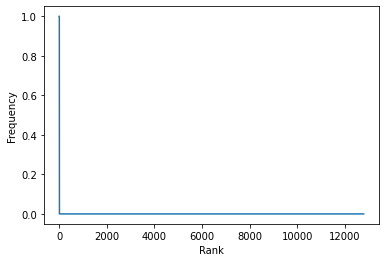

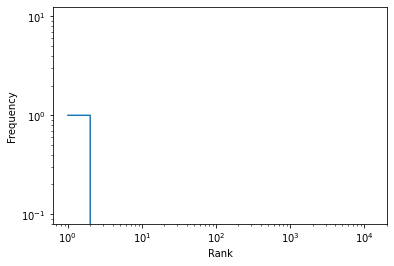

In [ ]:
show_distribution(unigram, train) # try bigram, trigram and combined as well

In [ ]:
train.data

,content,score,tb_polarity,tb_subjectivity,vader_pos,vader_neg,vader_comp,sentiment
0,used love app used year even yesterday paid ve...,1.00,0.25,0.33,0.33,0.00,0.89,1
1,paid version year never succeeded getting 3day...,1.00,0.06,0.61,0.11,0.15,-0.21,0
2,programmer absolutely lazily put together tras...,1.00,-0.13,0.43,0.17,0.06,0.70,1
3,redoing review messaging app basically everyth...,1.00,0.30,0.53,0.19,0.12,0.48,1
4,task done duplicate appear task causing remove...,1.00,-0.12,0.66,0.10,0.12,-0.18,0
...,...,...,...,...,...,...,...,...
11610,wonderful,5.00,1.00,1.00,1.00,0.00,0.57,1
11612,great design,5.00,0.80,0.75,0.80,0.00,0.62,1
11613,app good,5.00,0.70,0.60,0.74,0.00,0.44,1
11615,app part daily life ita funeral distraction iv...,5.00,0.10,0.25,0.26,0.25,0.08,1


In [ ]:
test.data

,content,score,tb_polarity,tb_subjectivity,vader_pos,vader_neg,vader_comp,sentiment
11617,amazing useful simple content,5.00,0.30,0.42,0.77,0.00,0.77,1
11618,functional enjoyable use work well show whats ...,5.00,0.25,0.30,0.42,0.00,0.61,1
11619,cool concept,5.00,0.35,0.65,0.70,0.00,0.32,1
11620,,5.00,0.00,0.00,0.00,0.00,0.00,0
11621,love widget turned phone screen jarvis,5.00,0.50,0.60,0.46,0.00,0.64,1
...,...,...,...,...,...,...,...,...
17128,excellent planner,5.00,1.00,1.00,0.79,0.00,0.57,1
17129,far good,5.00,0.40,0.80,0.74,0.00,0.44,1
17131,excellent,5.00,1.00,1.00,1.00,0.00,0.57,1
17133,best planner found yet appreciate easily break...,5.00,0.72,0.57,0.57,0.00,0.85,1


**George Testing End**

# TF-IDF

In [ ]:
# word tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer='word')
X_w = vectorizer.fit_transform(example_docs)
vectorizer.get_feature_names()
X_w.toarray()

array([[0.10509868, 0.13533368, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.10509868, 0.75238915, 0.25079638,
        0.        , 0.        , 0.        , 0.10509868, 0.        ,
        0.        , 0.10509868, 0.        , 0.        , 0.10509868,
        0.10509868, 0.        , 0.25079638, 0.25079638, 0.        ,
        0.        , 0.25079638, 0.        , 0.20818254, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.10509868, 0.        , 0.        ,
        0.20818254, 0.        , 0.        ],
       [0.15785732, 0.20327004, 0.        , 0.        , 0.37669403,
        0.        , 0.        , 0.15785732, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.15785732, 0.        ,
        0.37669403, 0.15785732, 0.        , 0.37669403, 0.15785732,
        0.15785732, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
   

In [ ]:
# n-gram tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(2, 3))
X_n = vectorizer.fit_transform(example_docs)
vectorizer.get_feature_names()
X_n.toarray()

array([[0.        , 0.        , 0.2090985 , 0.2090985 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.11283285, 0.        , 0.2090985 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.08762477, 0.08762477, 0.2090985 ,
        0.2090985 , 0.2090985 , 0.2090985 , 0.2090985 , 0.2090985 ,
        0.2090985 , 0.2090985 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.08762477, 0.08762477,
        0.        , 0.        , 0.        , 0.        , 0.08762477,
        0.08762477, 0.        , 0.        , 0.        , 0.        ,
        0.08762477, 0.        , 0.        , 0.2090985 , 0.2090985 ,
        0.2090985 , 0.2090985 , 0.        , 0.        , 0.        ,
        0.        , 0.2090985 , 0.2090985 , 0.  

In [ ]:
# Veriye uygulanması:
tf_idf_word_vectorizer = TfidfVectorizer()
X_tf_idf_word = tf_idf_word_vectorizer.fit_transform(X)

# 5. Modeling

In [ ]:
# Logistic Regression

log_model = LogisticRegression().fit(X_tf_idf_word, y)

cross_val_score(log_model,
                X_tf_idf_word,
                y, scoring="accuracy",
                cv=5).mean()

yeni_yorum = pd.Series("this product is great")
yeni_yorum = pd.Series("look at that shit very bad")
yeni_yorum = pd.Series("it was good but I am sure that it fits me")

yeni_yorum = CountVectorizer().fit(X).transform(yeni_yorum)
log_model.predict(yeni_yorum)

array([1])

In [ ]:
# orjinal yorumlardan modele sorabilir miyiz?
random_review = pd.Series(df["content"].sample(1).values)
random_review

0    lovely app cant think better app one thing guy...
dtype: object

In [ ]:
yeni_yorum = CountVectorizer().fit(X).transform(random_review)
log_model.predict(yeni_yorum)

array([1])

# Random Forests

In [ ]:
# Count Vectors
rf_model = RandomForestClassifier().fit(X_count, y)
cross_val_score(rf_model, X_count, y, cv=5, n_jobs=-1).mean()

0.8522249127884018

In [ ]:
# TF-IDF Word-Level
rf_model = RandomForestClassifier().fit(X_tf_idf_word, y)
cross_val_score(rf_model, X_tf_idf_word, y, cv=5, n_jobs=-1).mean()

0.8435004746158741

In [ ]:
# TF-IDF N-GRAM
#rf_model = RandomForestClassifier().fit(X_tf_idf_ngram, y)
#cross_val_score(rf_model, X_tf_idf_ngram, y, cv=5, n_jobs=-1).mean()

In [ ]:
# Hiperparametre Optimizasyonu

rf_model = RandomForestClassifier(random_state=17)

rf_params = {"max_depth": [5, 8, None],
             "max_features": [5, 7, "auto"],
             "min_samples_split": [2, 5, 8, 20],
             "n_estimators": [100, 200, 500]}

rf_best_grid = GridSearchCV(rf_model,
                            rf_params,
                            cv=5,
                            n_jobs=-1,
                            verbose=True).fit(X_count, y)

rf_best_grid.best_params_

rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state=17).fit(X_count, y)

cv_results = cross_validate(rf_final, X_count, y, cv=3, scoring=["accuracy", "f1", "roc_auc"])

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [ ]:
rf_best_grid.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:
rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state=17).fit(X_count, y)

In [ ]:
cv_results = cross_validate(rf_final, X_count, y, cv=3, scoring=["accuracy", "f1", "roc_auc"])